# Name : Snehal shyam jagtap

## Assignement No 14



### RANDOM FOREST

## Step 1. Exploratory Data Analysis (EDA)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('glass dataset.csv')

In [7]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [9]:
data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [10]:
data.shape

(214, 10)

In [11]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [12]:
data['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

## Step 2. Data Visualization

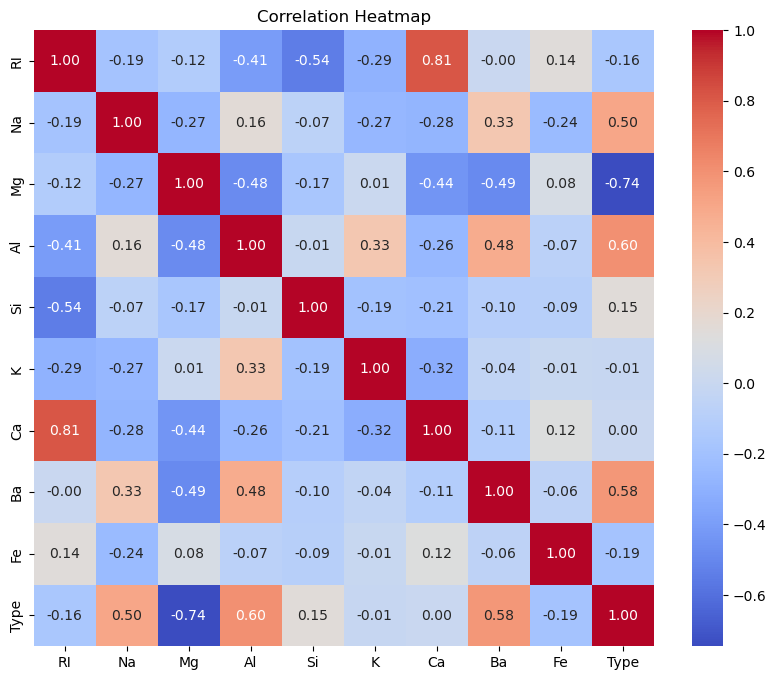

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

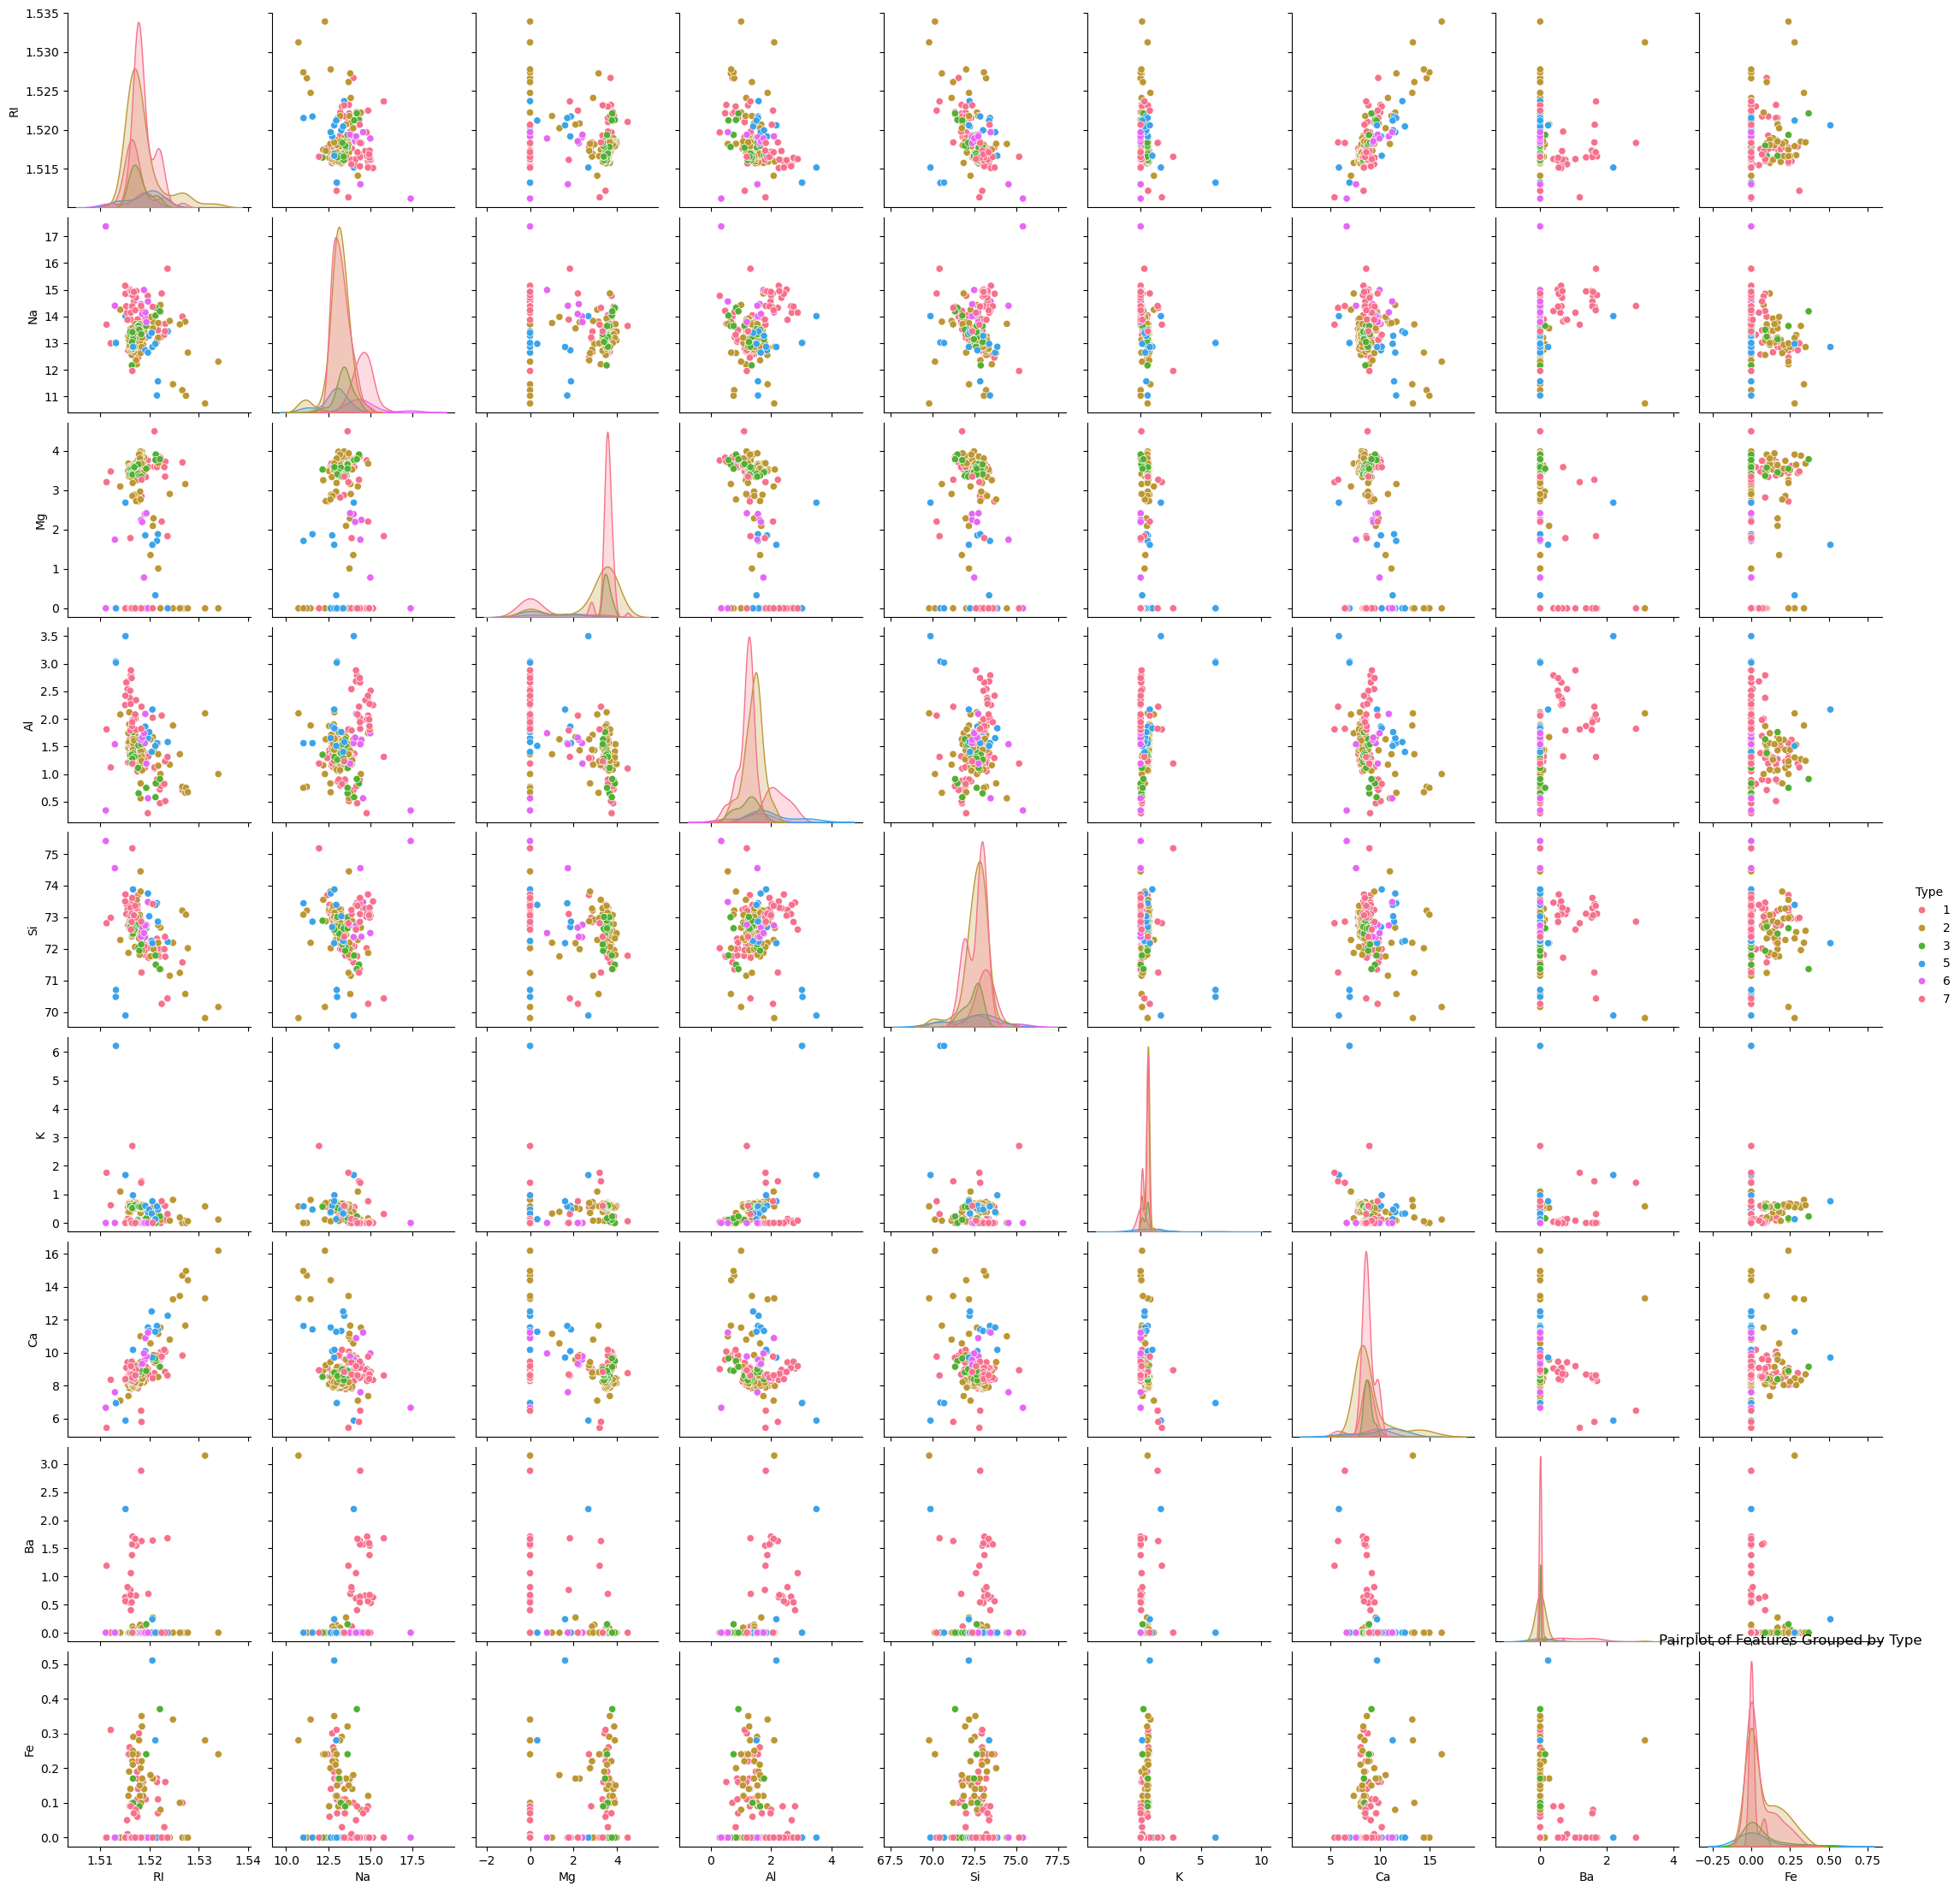

In [15]:
sns.pairplot(data, hue='Type', palette='husl')
plt.title('Pairplot of Features Grouped by Type')
plt.show()

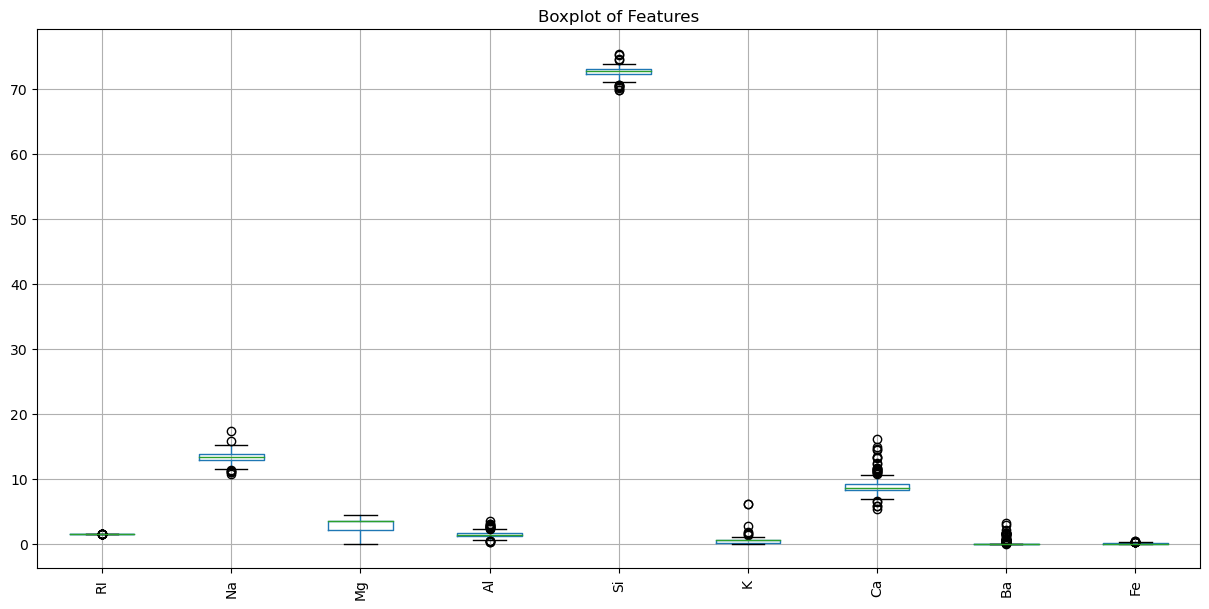

In [16]:
plt.figure(figsize=(15, 7))
data.drop(columns='Type').boxplot()
plt.title('Boxplot of Features')
plt.xticks(rotation=90)
plt.show()

## Step 3. Data Preprocessing

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [19]:
X = data.drop(columns='Type')
y = data['Type']

In [20]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

## Step 4. Random Forest Model 

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [25]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [26]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [27]:
y_pred = rf_model.predict(X_test)

In [28]:
print("Random Forest Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Random Forest Model Performance:
Accuracy: 0.9347826086956522

Classification Report:
               precision    recall  f1-score   support

           1       0.88      0.82      0.85        17
           2       0.89      0.89      0.89        19
           3       0.82      0.90      0.86        10
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        18

    accuracy                           0.93        92
   macro avg       0.93      0.94      0.93        92
weighted avg       0.94      0.93      0.93        92


Confusion Matrix:
 [[14  1  2  0  0  0]
 [ 2 17  0  0  0  0]
 [ 0  1  9  0  0  0]
 [ 0  0  0 14  0  0]
 [ 0  0  0  0 14  0]
 [ 0  0  0  0  0 18]]


## Step 5. Bagging and Boosting Methods

## Bagging with Random Forest:


In [35]:
from sklearn.ensemble import BaggingClassifier

In [36]:
bagging_model = BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=50, random_state=42)
bagging_model.fit(X_train, y_train)

C:\Users\sneha\Downloads\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=50,
                  random_state=42)

In [37]:

y_pred_bagging = bagging_model.predict(X_test)

In [38]:
print("Bagging Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_bagging))

Bagging Classifier Performance:
Accuracy: 0.9565217391304348


## Boosting with Gradient Boosting:

In [44]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting Classifier
boosting_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
boosting_model.fit(X_train, y_train)



GradientBoostingClassifier(random_state=42)

In [45]:
# Predictions and evaluation
y_pred_boosting = boosting_model.predict(X_test)


In [46]:

print("Boosting Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_boosting))


Boosting Classifier Performance:
Accuracy: 0.9130434782608695


## Additional Notes

## 1. Bagging vs. Boosting

### **Bagging (Bootstrap Aggregating):**
- **Definition**: Bagging is an ensemble method where multiple models are trained independently on random subsets of the training data.
- **Goal**: To reduce variance and prevent overfitting.
- **Example**: Random Forest.

**Advantages of Bagging**:
- Reduces variance.
- Works well with unstable models.
- Parallelizable.

**Disadvantages**:
- Doesn't reduce bias.
- Can lead to a complex model.

---

### **Boosting:**
- **Definition**: Boosting is a sequential ensemble method where each model tries to correct the errors of the previous one.
- **Goal**: To reduce bias and variance.
- **Example**: Gradient Boosting, AdaBoost.

**Advantages of Boosting**:
- Improves accuracy.
- Reduces bias.

**Disadvantages**:
- Prone to overfitting.
- Computationally expensive.

---

### **Differences Between Bagging and Boosting:**

| **Aspect**           | **Bagging**                  | **Boosting**                  |
|----------------------|------------------------------|--------------------------------|
| **Training Process**  | Independent (parallel)       | Sequential (dependent)        |
| **Error Reduction**   | Reduces variance             | Reduces bias and variance     |
| **Focus**             | Random subsets of data       | Correcting errors of previous models |
| **Overfitting Risk**  | Lower                        | Higher (if not tuned properly)|
| **Computation**       | Parallelizable               | Sequential, harder to parallelize|



---

## 2. Handling Imbalance in Data:

### **Strategies:**
1. **Resampling**: 
   - **Oversampling**: Duplicating or generating synthetic data for the minority class (e.g., SMOTE).
   - **Undersampling**: Reducing the majority class samples.
   
2. **Class Weights**: Assign higher weights to the minority class during training.

3. **Algorithmic Adjustments**: Use algorithms like **XGBoost** or **Random Forests** that are robust to imbalanced data.

4. **Evaluation Metrics**: Use metrics such as **F1-score**, **Precision**, **Recall**, and **ROC-AUC**.

---

### **Example using SMOTE:**
```python
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
